# 06. Effect of Spore Density

## Numerical experiments - Week 03/2025

_Boyan Mihaylov, MSc Computational Science (UVA/VU)_

## Prerequisite libraries

In [1]:
import numpy as np
from importlib import reload
import setup as st
import diffusion as df
import conversions as conv
import plotting as pt

## 1. Functional relationship between spore density and saturation

The previous notebook explored spore densities consistent with experimental setups where density-induced inhibition was observed. While the numerical experiments did not indicate an effect of spore density in a regular grid-like 3D distribution, an open question remains at which densities a local saturation becomes noticeable. To establish a functional relationship between the spore density and the inhibitor concentration at the spore at 4 hours, multiple simulations need to be performed with varying periodic lattice sizes, indicative of different spore grid densities.

The bottom limit of the density range is set at $3\times10^4$ spores/mL - an value just below the previously observed densities. The upper extreme is set at a configuration where the spore only has a single layer of free lattice sites around it. This corresponds to a lattice edge length of $L=3\times 5\mu\text{m}=15\mu\text{m}$ and a volume $V=3.375\times 10^{-9}$ mL, corresponding to a spore density of approximately $2.96\times 10^{8}$ spores/mL. This is rounded to $3\times 10^{8}$ spores/mL.

[3.00000000e+04 5.33483823e+04 9.48683298e+04 1.68702398e+05
 3.00000000e+05 5.33483823e+05 9.48683298e+05 1.68702398e+06
 3.00000000e+06 5.33483823e+06 9.48683298e+06 1.68702398e+07
 3.00000000e+07 5.33483823e+07 9.48683298e+07 1.68702398e+08
 3.00000000e+08]
Populating uniform 3D spore grid
Conversion: 3.00000000000000E-8 micrometers^-3
Effective density: 2.999999892949745e-08 spores/micrometer^3
Populating volume of 262144000 micrometers^3 with 7.86431971937418 spores, 1 spores per dimension
Spore spacing: 640.0 micrometers
Conversion: 5.33483823011677E-8 micrometers^-3
Effective density: 5.334838348858284e-08 spores/micrometer^3
Populating volume of 262144000 micrometers^3 with 13.98495864123106 spores, 2 spores per dimension
Spore spacing: 320.0 micrometers
Conversion: 9.48683298050514E-8 micrometers^-3
Effective density: 9.48683265278305e-08 spores/micrometer^3
Populating volume of 262144000 micrometers^3 with 24.8691625893116 spores, 2 spores per dimension
Spore spacing: 320.0 m

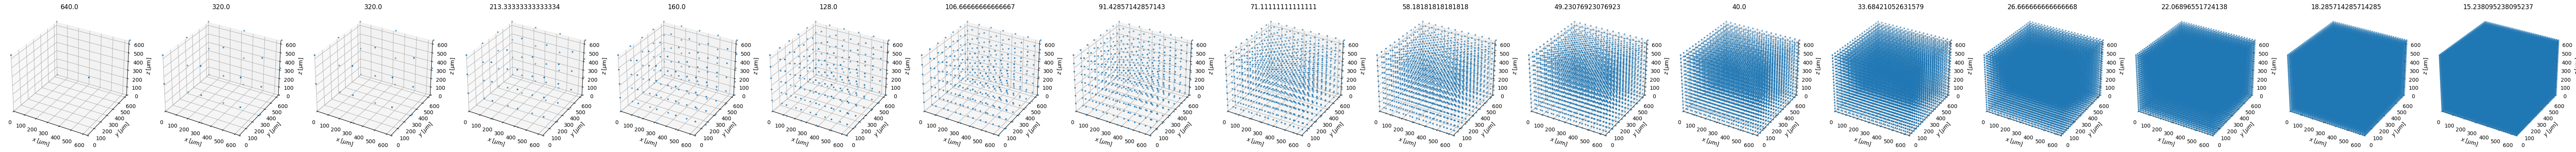

In [6]:
spore_densities = 3 * 10 ** np.arange(4, 8.25, 0.25)
print(spore_densities)

N = 127
dx = 5

# Uniform spore grid
print("Populating uniform 3D spore grid")
spore_coords_all = []
spore_spacing_all = []

for spore_density in spore_densities:
    spore_density = conv.inverse_mL_to_micrometers_cubed(spore_density)
    spore_coords, spore_spacing = st.populate_spore_grid_coords(N, dx, spore_density)
    spore_coords_all.append(spore_coords)
    spore_spacing_all.append(spore_spacing)

pt.plot_spore_positions(np.full(len(spore_coords_all), N), np.full(len(spore_coords_all), N), spore_coords_all, dx,
                        titles=spore_spacing_all)

The diffusion procedure is then run with at all spore densities until $t_{\textrm{max}}=12 \textrm{h}$ to observe any prolonged inhibitor releases. Once the concentration at the spore reaches the inhibition threshold, the simulation is terminated.

In [12]:
# Use fitted permeation coefficient
Ps_fit = 0.0002675353069511818 # microns/s

# Cell wall and spore parameters
V_spore = 125 # microns^3
V_cell_wall = 19.5 # microns^3
c_spore = 1.018 # M
c_cell_wall = 1.018 # M

# Inhibitor cutoff concentration
c_cutoff = 1e-2

# General simulation parameters
# t_max = 14400 # seconds
t_max = 43200 # 12 hours, extra time to account for slow diffusion
dt = 0.005
dx = 5 # microns
n_save_frames = 100
c_thresh_factors = 10.0**(-np.arange(1, 7))

# Define experiment parameters
global_id = 'ms_250121'
exp_params = []
title_base = 'spores/mL,\nspore spacing: '
for i, density in enumerate(spore_densities):
    # spore_spacing = st.lattice_size_from_density(conv.inverse_mL_to_micrometers_cubed(density), 5)
    label = str(np.format_float_scientific(np.round(density, 1))) + title_base + f'{round(spore_spacing_all[i])} $\mu$m'
    exp_params.append({'expID': global_id, 'simID': f'D{density}', 'label': label, 'dims': 3,
                       'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall, 'spore_density': density})

# Run simulations
st.run_diffusion_experiments_multi_spore(exp_params, t_max, dt, dx, n_save_frames, V_spore, c_thresh_factors, c_cutoff=c_cutoff)

<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mihbo\AppData\Local\Temp\ipykernel_15068\933234038.py:27: SyntaxWarning: invalid escape sequence '\m'
  label = str(np.format_float_scientific(np.round(density, 1))) + title_base + f'{round(spore_spacing_all[i])} $\mu$m'
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 64 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 3.00000000000000E-8 micrometers^-3
D30000.0: Running simulation 3.e+04spores/mL,
spore spacing: 640 $\mu$m on lattice with size 65
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [330 330 330] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 5.33483823011677E-8 micrometers^-3
D53348.38230116768: Running simulation 5.33484e+04spores/mL,
spore spacing: 320 $\mu$m on lattice with size 54
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [275 275 275] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 9.48683298050514E-8 micrometers^-3
D94868.32980505138: Running simulation 9.48683e+04spores/mL,
spore spacing: 320 $\mu$m on lattice with size 44
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [225 225 225] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 1.68702397557105E-7 micrometers^-3
D168702.39755710473: Running simulation 1.687024e+05spores/mL,
spore spacing: 213 $\mu$m on lattice with size 37
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [190 190 190] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 125 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 3.00000000000000E-7 micrometers^-3
D300000.0: Running simulation 3.e+05spores/mL,
spore spacing: 160 $\mu$m on lattice with size 30
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [155 155 155] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 64 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 5.33483823011677E-7 micrometers^-3
D533483.8230116768: Running simulation 5.334838e+05spores/mL,
spore spacing: 128 $\mu$m on lattice with size 25
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [130 130 130] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 9.48683298050514E-7 micrometers^-3
D948683.2980505137: Running simulation 9.486833e+05spores/mL,
spore spacing: 107 $\mu$m on lattice with size 21
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [110 110 110] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 27 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 0.00000168702397557105 micrometers^-3
D1687023.9755710475: Running simulation 1.687024e+06spores/mL,
spore spacing: 91 $\mu$m on lattice with size 17
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [90 90 90] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 45 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 0.00000300000000000000 micrometers^-3
D3000000.0: Running simulation 3.e+06spores/mL,
spore spacing: 71 $\mu$m on lattice with size 14
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [75 75 75] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 8 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 26 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 0.00000533483823011677 micrometers^-3
D5334838.230116769: Running simulation 5.3348382e+06spores/mL,
spore spacing: 58 $\mu$m on lattice with size 12
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [65 65 65] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 17 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 0.00000948683298050514 micrometers^-3
D9486832.980505139: Running simulation 9.486833e+06spores/mL,
spore spacing: 49 $\mu$m on lattice with size 10
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [55 55 55] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 10 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 0.0000168702397557105 micrometers^-3
D16870239.755710475: Running simulation 1.68702398e+07spores/mL,
spore spacing: 40 $\mu$m on lattice with size 8
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [45 45 45] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 5 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 0.0000300000000000000 micrometers^-3
D30000000.0: Running simulation 3.e+07spores/mL,
spore spacing: 34 $\mu$m on lattice with size 7
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [40 40 40] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 0.0000533483823011677 micrometers^-3
D53348382.30116768: Running simulation 5.33483823e+07spores/mL,
spore spacing: 27 $\mu$m on lattice with size 6
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [35 35 35] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 2 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 0.0000948683298050514 micrometers^-3
D94868329.80505137: Running simulation 9.48683298e+07spores/mL,
spore spacing: 22 $\mu$m on lattice with size 5
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [30 30 30] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 0.000168702397557105 micrometers^-3
D168702397.5571047: Running simulation 1.687023976e+08spores/mL,
spore spacing: 18 $\mu$m on lattice with size 4
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [25 25 25] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 0.000300000000000000 micrometers^-3
D300000000.0: Running simulation 3.e+08spores/mL,
spore spacing: 15 $\mu$m on lattice with size 3
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [20 20 20] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


When plotting the results, an attempt is made to fit general equation through the data, having the form

$$
\begin{equation}
f{(x)}=ax^be^{cx}+d
\end{equation}
$$

In [31]:
reload(conv)
reload(pt)
reload(st)
reload(df)

d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:40: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_xlabel('$x$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:41: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_ylabel('$y$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:45: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_zlabel('$z$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:315: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_ylabel('Concentration at spore [M]')


<module 'diffusion' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\diffusion.py'>

Plotting simulation D30000.0: 3.e+04spores/mL,
spore spacing: 640 $\mu$m
Plotting simulation D53348.38230116768: None
Plotting simulation D94868.32980505138: None
Plotting simulation D168702.39755710473: None
Plotting simulation D300000.0: None
Plotting simulation D533483.8230116768: None
Plotting simulation D948683.2980505137: None
Plotting simulation D1687023.9755710475: None
Plotting simulation D3000000.0: None
Plotting simulation D5334838.230116769: None
Plotting simulation D9486832.980505139: None
Plotting simulation D16870239.755710475: None
Plotting simulation D30000000.0: None
Plotting simulation D53348382.30116768: None
Plotting simulation D94868329.80505137: None
Plotting simulation D168702397.5571047: None
Plotting simulation D300000000.0: 3.e+08spores/mL,
spore spacing: 15 $\mu$m


d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:238: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


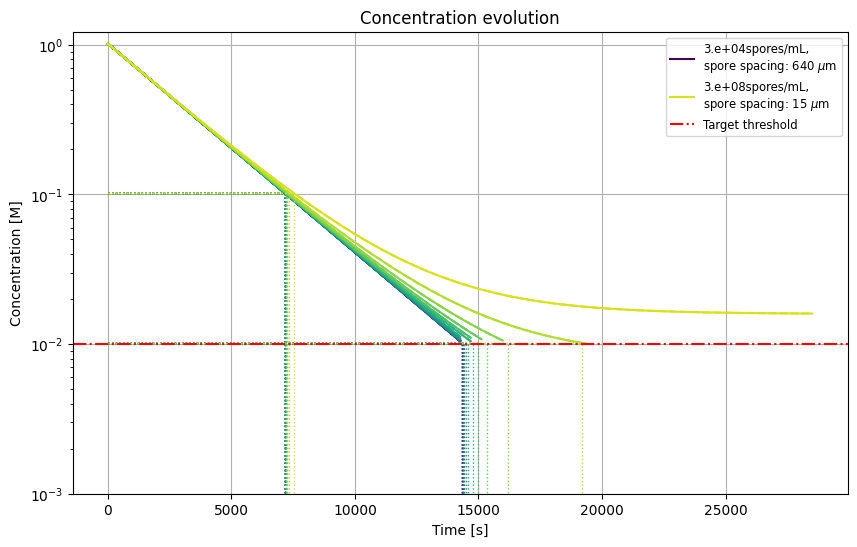

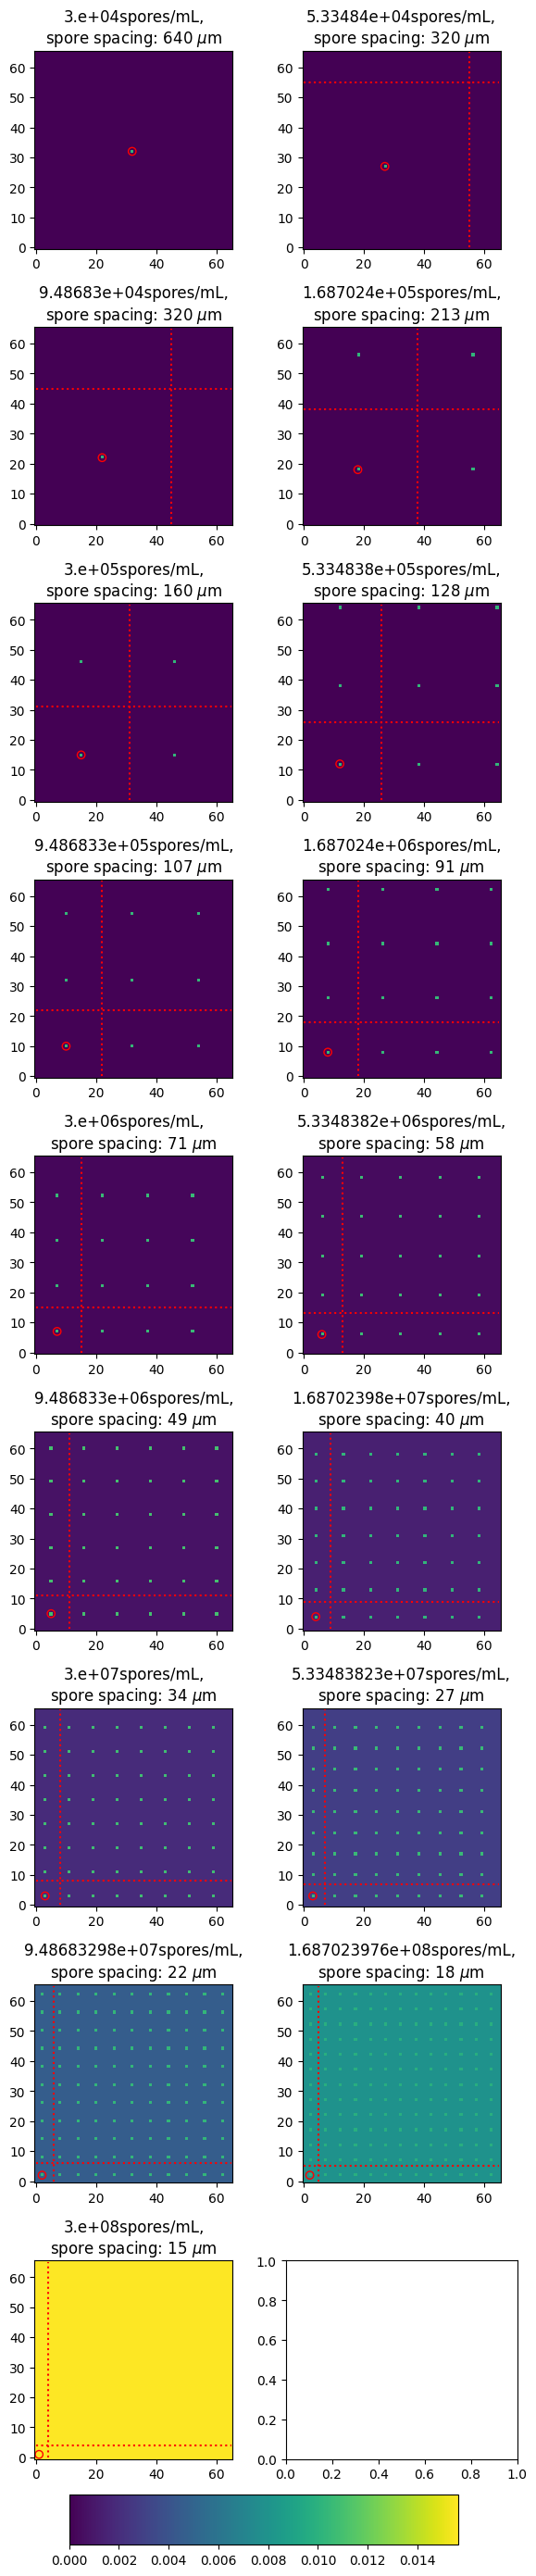

Conversion: 27826.4741074658 mL^-1
0.0104765060042372
Conversion: 48084.1472577010 mL^-1
0.0104789354595112
Conversion: 87791.4951989026 mL^-1
0.0104836977485887
Conversion: 145793.847499636 mL^-1
0.0104906545157057
Conversion: 268537.477761740 mL^-1
0.0105053767450769
Conversion: 455166.135639508 mL^-1
0.0105277620405347
Conversion: 751314.800901578 mL^-1
0.0105632844424957
Conversion: 1371742.11248285 mL^-1
0.0106377050115058
Conversion: 2370370.37037037 mL^-1
0.010757494491235
Conversion: 3641329.08511607 mL^-1
0.010909956610478
Conversion: 6010518.40721262 mL^-1
0.0111941761835988
Conversion: 10973936.8998628 mL^-1
0.0117896758300245
Conversion: 15625000.0000000 mL^-1
0.0123477770005972
Conversion: 23323615.1603499 mL^-1
0.0132717302859185
Conversion: 37037037.0370370 mL^-1
0.0149180556306814
Conversion: 64000000.0000000 mL^-1
0.0181568827434416
Conversion: 125000000.000000 mL^-1
0.0254933462803913
Fitted coefficients: [0.5 0.5 0.5 0.5 0.5]


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:296: OptimizeWarning: Covariance of the parameters could not be estimated
  print(f"Fitted coefficients: {coeffs}")


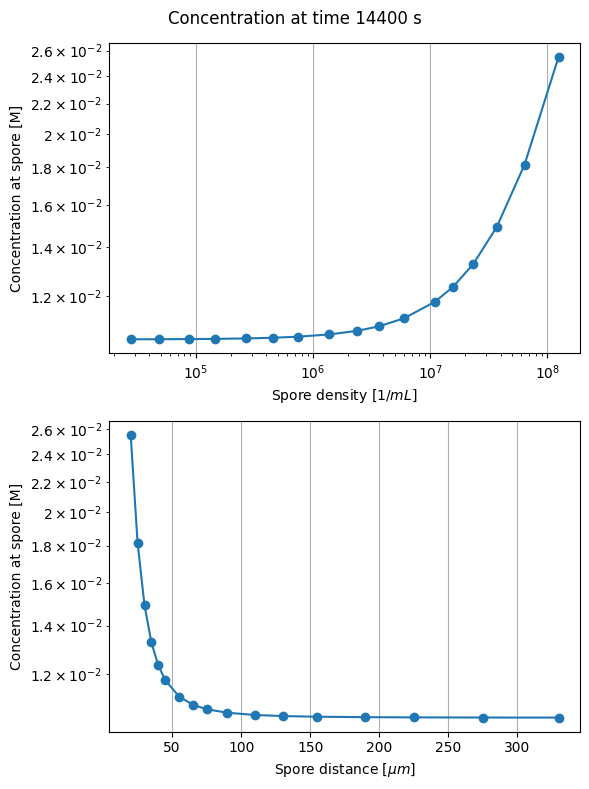

In [33]:
def general_equation(x, a, b, c, d, e):
    return a * np.power(x, b) * np.exp(c * np.power(x, e)) + d

global_id = 'ms_250121'
t_max = 14400
pt.plot_experiment_results(global_id, logy=True, target_thresh=0.01, mark_spore=True, heatmap_size=6, label_last=True, t_max=2*t_max)
# pt.plot_densities_vs_concentrations_at_time(global_id, t_max, alogx=True, alogy=True, blogx=True, blogy=True, model_fit=general_equation)
pt.plot_densities_vs_concentrations_at_time(global_id, t_max, alogx=True, alogy=True, blogy=True, model_fit=general_equation)

The results indicate a saturation with faster than exponential increase in increased spore density and a decreased inter-spore distance.

## 3. Diffusion between spores at the bottom of the medium

A heterogeneous densification occurs naturally when spores sink to the bottom of the medium due to gravity. In a typical experimental setup [1] the time until spores sink to the bottom of a well filled with $150 \mu\textrm{L}$ medium (from which a medium depth of 3.9 mm is calculated) is about 1 hours. This is a significant period overlapping with inhibitor release that needs to be accounted for. For the sake of simplicity it is assumed that during the settling process the inhibitor diffuses homogeneously like in the 3D grid scenario, so the simulations of the 2D lattice bottom array start with a concentration equivalent to $c(t=3600\textrm{s})$.

The lattice used in these simulations is periodic along the $x$ and the $y$ dimensions but has a Neumann boundary condition at $z=0$ and $z=h$, which sets the derivative of the concentration normal to the boundary to zero. As before, the lattice size along the first two dimensions is adapted to the input spore density. The spore densities from the first multi-spore experiment (5000, 10000, 20000, and 40000 spores per $150 \mu\text{L}$) are used. The height of the medium is set to $h=3900\mu\textrm{m}$, which equates to $H=780$ lattice sites in the $z$-direction.

In [7]:
# Use fitted permeation coefficient
Ps_fit = 0.0002675353069511818 # microns/s

# Cell wall and spore parameters
V_spore = 125 # microns^3
V_cell_wall = 19.5 # microns^3
c_spore = 1.018 # M
c_cell_wall = 1.018 # M

# Calculate concentration after 1 hour of settling
spore_vol = 125
spore_area = 150
t_settling = 3600
c_1h = df.permeation_time_dependent_analytical(c_cell_wall, 0, t_settling, Ps_fit, spore_area, spore_vol, alpha=1.0)
print(f'Concentration after 1 hour of settling: {c_1h}')

# General simulation parameters
t_max = 10800 # seconds, 3 hours after 1 hour of settling
dt = 0.005
dx = 5 # microns
H = 780
n_save_frames = 1000
c_thresh_factors = 10.0**(-np.arange(1, 7))

# Input spore densities
spore_density_base = 1/3 * 10**5 # spores per mL
density_factors = 2**np.arange(0, 4, 1)
spore_densities = spore_density_base * density_factors

# Define experiment parameters
global_id = 'msb_250115'
exp_params = []
title_base = 'spores/mL,\nspore spacing: '
for i, density in enumerate(spore_densities):
    spore_spacing = st.lattice_size_from_density(conv.inverse_mL_to_micrometers_cubed(density), 5, 780)
    label = str(np.format_float_scientific(np.round(density, 1))) + title_base + f'{round(spore_spacing)} $\mu$m'
    exp_params.append({'expID': global_id, 'simID': f'D{density}', 'label': label, 'dims': 3,
                       'D': None, 'Ps': Ps_fit, 'c0': c_1h, 'spore_density': density})

# Run simulations
st.run_diffusion_experiments_multi_spore(exp_params, t_max, dt, dx, n_save_frames, V_spore, c_thresh_factors, H)

3114.853672324434
Concentration after 1 hour of settling: 0.32048730675932574
Conversion: 3.33333333333333E-8 micrometers^-3
Conversion: 6.66666666666667E-8 micrometers^-3
Conversion: 1.33333333333333E-7 micrometers^-3
Conversion: 2.66666666666667E-7 micrometers^-3


<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mihbo\AppData\Local\Temp\ipykernel_27780\302661367.py:36: SyntaxWarning: invalid escape sequence '\m'
  label = str(np.format_float_scientific(np.round(density, 1))) + title_base + f'{round(spore_spacing)} $\mu$m'


In [39]:
reload(pt)

d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:39: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_xlabel('$x$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:40: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_ylabel('$y$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:44: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_zlabel('$z$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:257: SyntaxWarning: invalid escape sequence '\m'
  if logx:


<module 'plotting' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\plotting.py'>

Plotting simulation D33333.33333333333: 3.333333e+04spores/mL,
spore spacing: 316 $\mu$m
Plotting simulation D66666.66666666666: 6.666667e+04spores/mL,
spore spacing: 250 $\mu$m
Plotting simulation D133333.3333333333: 1.333333e+05spores/mL,
spore spacing: 200 $\mu$m
Plotting simulation D266666.6666666666: 2.666667e+05spores/mL,
spore spacing: 160 $\mu$m


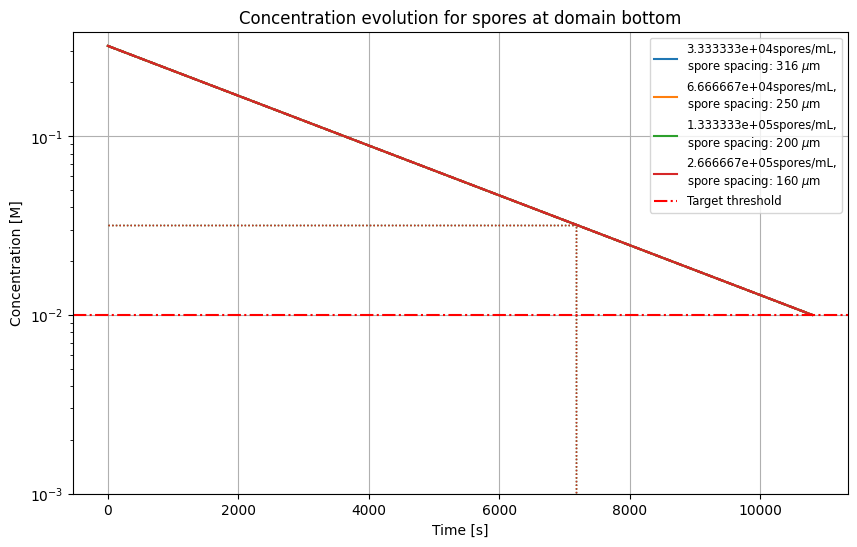

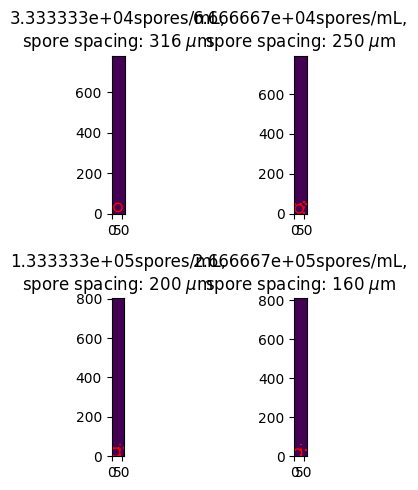

In [17]:
global_id = 'msb_250115'
pt.plot_experiment_results(global_id, logy=True, target_thresh=0.01, mark_spore=True, title='Concentration evolution for spores at domain bottom')

The functional relationship between spore density and saturation is examined here as well by taking a denser and broader grid of density samples. Under the given medium height, the maximum density that permits spatial packing of the spores in 2D without overlaps is lower than the previous limit. Here it is set to $3\times10^6$ spores/mL, corresponding to about to $10\mu\textrm{m}$ spore-to-spore distance.

[  30000.           53348.38230117   94868.32980505  168702.3975571
  300000.          533483.82301168  948683.29805051 1687023.97557105
 3000000.        ]
Populating uniform 3D spore grid
Conversion: 3.00000000000000E-8 micrometers^-3
Effective density: 2.3399999165008012e-05 spores/micrometer^3
Populating volume of 136125 micrometers^3 with 3.1853248863367156 spores, 1 spores per dimension
Spore spacing: 165.0 micrometers
Conversion: 5.33483823011677E-8 micrometers^-3
Effective density: 4.1611739121094615e-05 spores/micrometer^3
Populating volume of 136125 micrometers^3 with 5.6643979878590045 spores, 2 spores per dimension
Spore spacing: 82.5 micrometers
Conversion: 9.48683298050514E-8 micrometers^-3
Effective density: 7.39972946917078e-05 spores/micrometer^3
Populating volume of 136125 micrometers^3 with 10.072881739908723 spores, 3 spores per dimension
Spore spacing: 55.0 micrometers
Conversion: 1.68702397557105E-7 micrometers^-3
Effective density: 0.000131587871692318 spores/micr

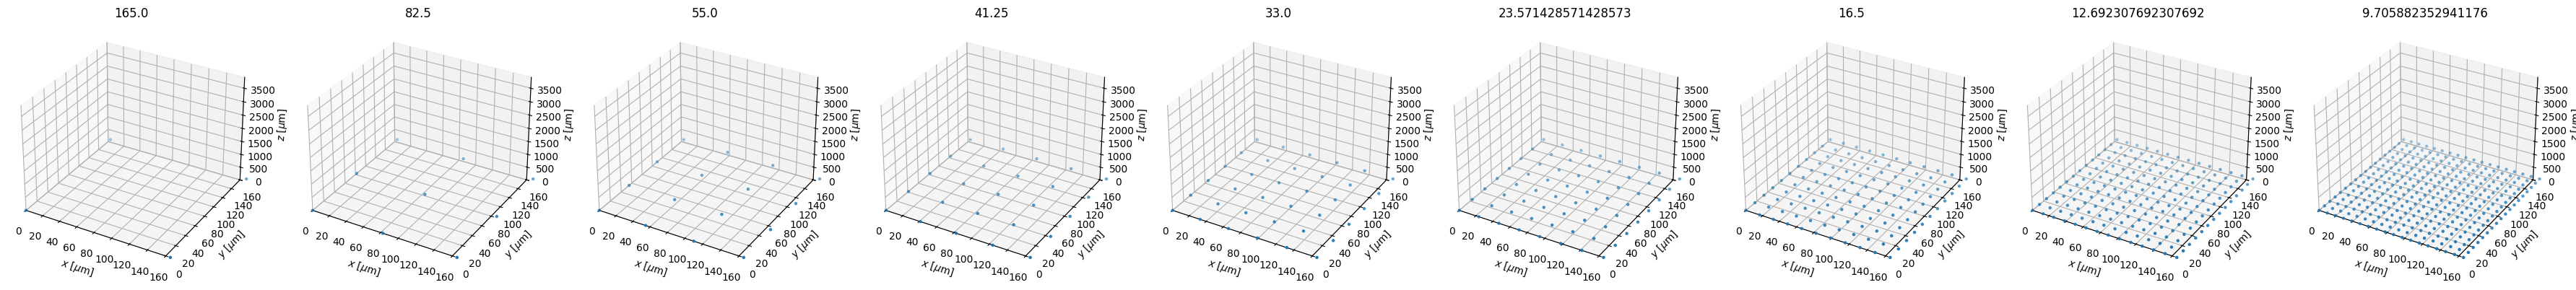

In [2]:
spore_densities = 3 * 10 ** np.arange(4, 6.25, 0.25)
print(spore_densities)

N = 32#127
H = 780
dx = 5

# Uniform spore grid
print("Populating uniform 3D spore grid")
spore_coords_all = []
spore_spacing_all = []

for spore_density in spore_densities:
    spore_density = conv.inverse_mL_to_micrometers_cubed(spore_density)
    spore_coords, spore_spacing = st.populate_spore_grid_coords(N, dx, spore_density, H)
    spore_coords_all.append(spore_coords)
    spore_spacing_all.append(spore_spacing)

pt.plot_spore_positions(np.full(len(spore_coords_all), N), np.full(len(spore_coords_all), H), spore_coords_all, dx,
                        titles=spore_spacing_all)

In [3]:
# Use fitted permeation coefficient
Ps_fit = 0.0002675353069511818 # microns/s

# Cell wall and spore parameters
V_spore = 125 # microns^3
V_cell_wall = 19.5 # microns^3
c_spore = 1.018 # M
c_cell_wall = 1.018 # M

# Inhibitor cutoff concentration
c_cutoff = 1e-2

# General simulation parameters
# t_max = 14400 # seconds
t_max = 43200 # 12 hours, extra time to account for slow diffusion
dt = 0.005
dx = 5 # microns
n_save_frames = 100
c_thresh_factors = 10.0**(-np.arange(1, 7))

# Define experiment parameters
global_id = 'msb_250121'
exp_params = []
title_base = 'spores/mL,\nspore spacing: '
for i, density in enumerate(spore_densities):
    # spore_spacing = st.lattice_size_from_density(conv.inverse_mL_to_micrometers_cubed(density), 5)
    label = str(np.format_float_scientific(np.round(density, 1))) + title_base + f'{round(spore_spacing_all[i])} $\mu$m'
    exp_params.append({'expID': global_id, 'simID': f'D{density}', 'label': label, 'dims': 3,
                       'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall, 'spore_density': density})

# Run simulations
st.run_diffusion_experiments_multi_spore(exp_params, t_max, dt, dx, n_save_frames, V_spore, c_thresh_factors, H, c_cutoff=c_cutoff)

<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mihbo\AppData\Local\Temp\ipykernel_17596\621301975.py:27: SyntaxWarning: invalid escape sequence '\m'
  label = str(np.format_float_scientific(np.round(density, 1))) + title_base + f'{round(spore_spacing_all[i])} $\mu$m'


Conversion: 3.00000000000000E-8 micrometers^-3
D30000.0: Running simulation 3.e+04spores/mL,
spore spacing: 165 $\mu$m on lattice with size 517
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [2590 2590 2590] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 64 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 5.33483823011677E-8 micrometers^-3
D53348.38230116768: Running simulation 5.33484e+04spores/mL,
spore spacing: 82 $\mu$m on lattice with size 388
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [1945 1945 1945] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 9.48683298050514E-8 micrometers^-3
D94868.32980505138: Running simulation 9.48683e+04spores/mL,
spore spacing: 55 $\mu$m on lattice with size 291
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [1460 1460 1460] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 1.68702397557105E-7 micrometers^-3
D168702.39755710473: Running simulation 1.687024e+05spores/mL,
spore spacing: 41 $\mu$m on lattice with size 218
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [1095 1095 1095] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 3.00000000000000E-7 micrometers^-3
D300000.0: Running simulation 3.e+05spores/mL,
spore spacing: 33 $\mu$m on lattice with size 164
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [825 825 825] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 5.33483823011677E-7 micrometers^-3
D533483.8230116768: Running simulation 5.334838e+05spores/mL,
spore spacing: 24 $\mu$m on lattice with size 123
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [620 620 620] microns.
Conversion: 9.48683298050514E-7 micrometers^-3
D948683.2980505137: Running simulation 9.486833e+05spores/mL,
spore spacing: 16 $\mu$m on lattice with size 92
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [465 465 465] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 0.00000168702397557105 micrometers^-3
D1687023.9755710475: Running simulation 1.687024e+06spores/mL,
spore spacing: 13 $\mu$m on lattice with size 69
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [350 350 350] microns.
Conversion: 0.00000300000000000000 micrometers^-3
D3000000.0: Running simulation 3.e+06spores/mL,
spore spacing: 10 $\mu$m on lattice with size 52
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 8640000 steps on a lattice of size [265 265 265] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


In [20]:
reload(pt)

d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:40: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_xlabel('$x$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:41: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_ylabel('$y$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:45: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_zlabel('$z$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:314: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_xlabel('Spore distance [$\mu m$]')


<module 'plotting' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\plotting.py'>

Plotting simulation D30000.0: 3.e+04spores/mL,
spore spacing: 165 $\mu$m
Plotting simulation D53348.38230116768: None
Plotting simulation D94868.32980505138: None
Plotting simulation D168702.39755710473: None
Plotting simulation D300000.0: None
Plotting simulation D533483.8230116768: None
Plotting simulation D948683.2980505137: None
Plotting simulation D1687023.9755710475: None
Plotting simulation D3000000.0: 3.e+06spores/mL,
spore spacing: 10 $\mu$m


d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:238: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


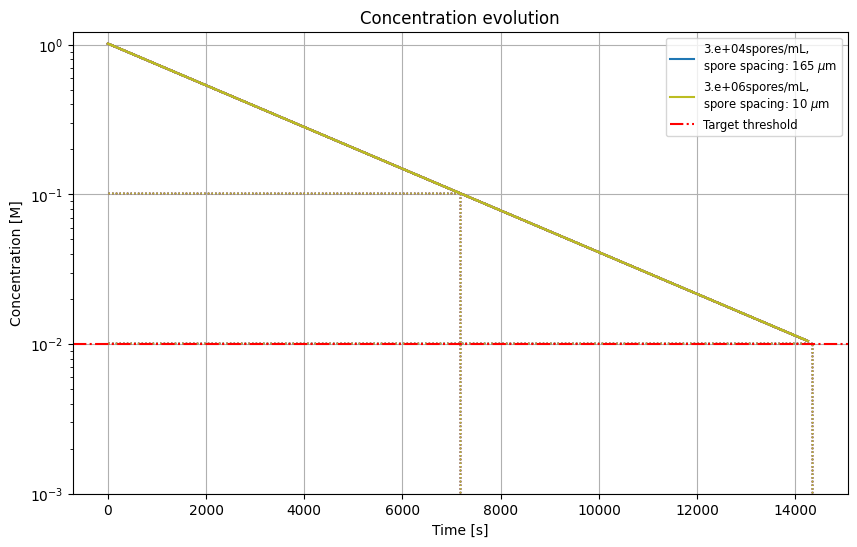

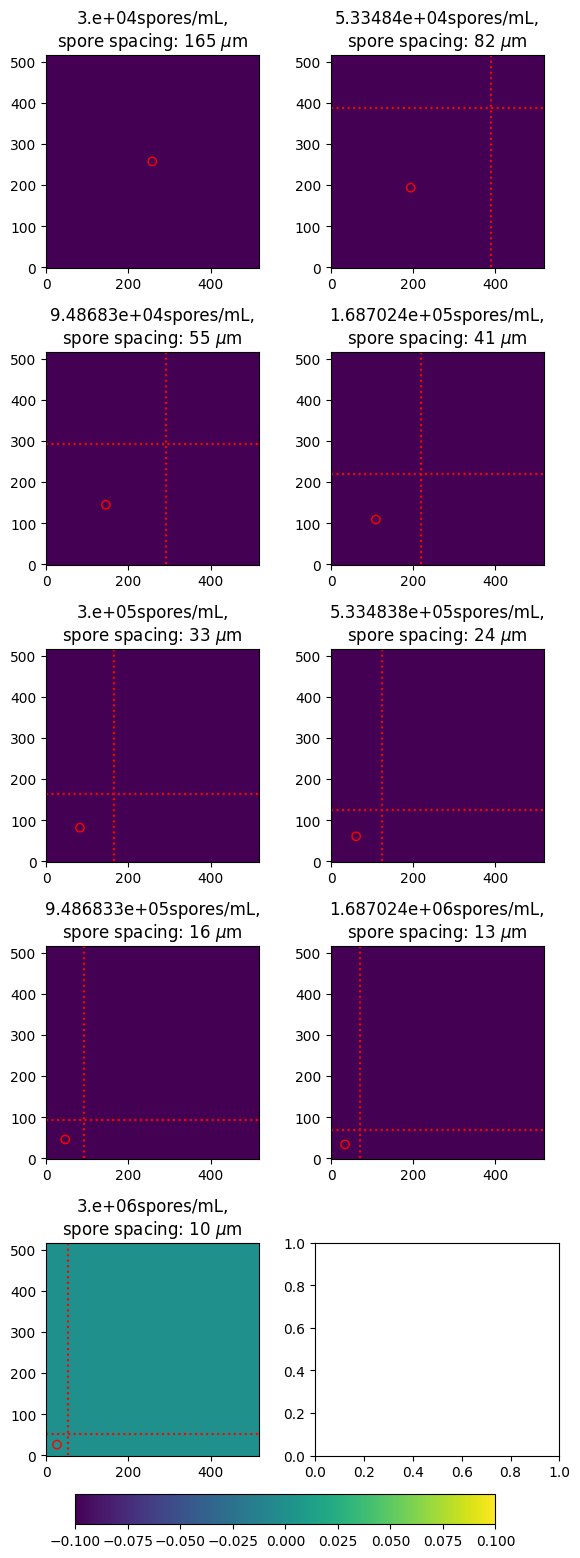

Conversion: 57.5573390528445 mL^-1
0.0104731770904184
Conversion: 135.906798786876 mL^-1
0.0104731863857698
Conversion: 321.322718544434 mL^-1
0.0104732084954292
Conversion: 761.653851364584 mL^-1
0.0104732611422216
Conversion: 1780.89434287781 mL^-1
0.0104733831790897
Conversion: 4195.89809002719 mL^-1
0.0104736725638855
Conversion: 9945.83250969408 mL^-1
0.0104743618727957
Conversion: 23323.6151603499 mL^-1
0.0104759660150488
Conversion: 53735.6341140673 mL^-1
0.0104796132524766
Fitted coefficients: [0.5 0.5 0.5 0.5 0.5]


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:296: OptimizeWarning: Covariance of the parameters could not be estimated
  print(f"Fitted coefficients: {coeffs}")


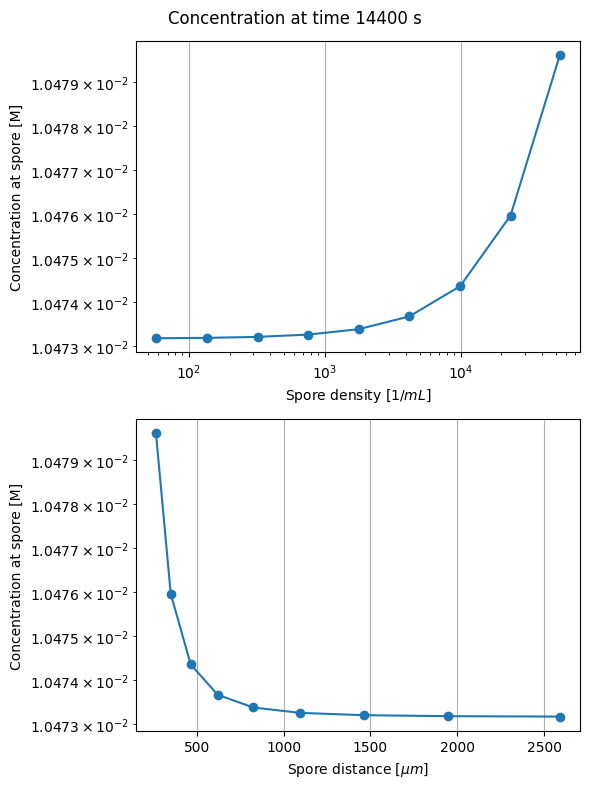

In [34]:
def general_equation(x, a, b, c, d, e):
    return a * np.power(x, b) * np.exp(c * np.power(x, e)) + d

global_id = 'msb_250121'
t_max = 14400
pt.plot_experiment_results(global_id, logy=True, target_thresh=0.01, mark_spore=True, heatmap_size=6, label_last=True, t_max=t_max)
# pt.plot_densities_vs_concentrations_at_time(global_id, t_max, alogx=True, alogy=True, blogx=True, blogy=True, model_fit=general_equation)
pt.plot_densities_vs_concentrations_at_time(global_id, t_max, alogx=True, alogy=True, blogy=True, model_fit=general_equation)

## References

[1] Ijadpanahsaravi, Maryam, L. Basten Snoek, Wieke R. Teertstra and Han A. B. Wösten. “The impact of inter- and intra-species spore density on germination of the food spoilage fungus Aspergillus niger.” International journal of food microbiology 410 (2023): 110495 .